# A Look at the TCGA RNA-seq Dataset

In [100]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from __future__ import print_function

from IPython.html import widgets
from IPython.display import display
from IPython.display import clear_output

In [104]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [105]:
df = pd.read_table('unaligned.tsv', sep='\t')

In [107]:
df = df[['barcode', 'analysis_id', 'disease_name', 'center', 'files_size']]
df['files_size'] = df['files_size'] / 1024.0 / 1024 / 1024
df.rename(columns = {'files_size':'size_GB'}, inplace=True)

In [109]:
df.head()

,barcode,analysis_id,disease_name,center,size_GB
0,TCGA-DQ-5630-01A-01R-1873-07,5557a728-1827-4aff-b28b-f004d835f9d6,Head and Neck squamous cell carcinoma,UNC-LCCC,5.353189
1,TCGA-KK-A7B0-01A-11R-A32O-07,2826301c-5d33-465a-99fa-401aea553a7f,Prostate adenocarcinoma,UNC-LCCC,5.292468
2,TCGA-DD-A3A3-11A-11R-A22L-07,bb9ecd73-ded7-4c4e-9674-d05647be7a22,Liver hepatocellular carcinoma,UNC-LCCC,4.354037
3,TCGA-VV-A829-01A-21R-A36H-07,f23c04eb-6f22-4b19-a6e3-90e7887f535e,Brain Lower Grade Glioma,UNC-LCCC,5.456621
4,TCGA-56-7222-01A-11R-2045-07,8aef55bf-eeca-40ac-9025-fff4fbcf1c24,Lung squamous cell carcinoma,UNC-LCCC,6.211421


In [112]:
print('Number of samples: %i' % len(df))
print('Min: %.2fGB' % min(df['size_GB']))
print('Max: %.2fGB' % max(df['size_GB']))
print('Avg: %.2fGB' % np.mean(df['size_GB']))
print('Total: %.2fGB or %.2fTB' % (sum(df['size_GB']), sum(df['size_GB'] / 1024)))

Number of samples: 11194
Min: 0.27GB
Max: 27.69GB
Avg: 6.18GB
Total: 69228.23GB or 67.61TB


<h5 align="center">Boxplot Reminder</h5> 

<img src="boxplot.png", style="width: 500px">

(0, 20)

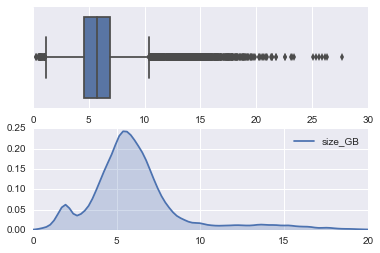

In [72]:
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(df['size_GB'], ax=ax1)
sns.kdeplot(df['size_GB'], ax=ax2, shade=True)
plt.xlim([0,20])

Click the button below to see a random sample of file sizes from the unaligned TCGA cohort

In [102]:
def func(btn):
    clear_output()
    for i in xrange(10):
        id = df.iloc[random.randint(1,11194)]['analysis_id']
        print('ID: %s Size: %.2fGB' % (id, (df[df['analysis_id'] == id]['size_GB'])))
        

btn = widgets.Button(description="Click me to see 10 random samples")
btn.on_click(func)
display(btn)

ID: e10c7cd1-fc51-4c68-a4b9-721037b33e74 Size: 5.29GB
ID: 9709e64c-0a33-4bf7-8a33-703a3d973d66 Size: 6.74GB
ID: c84b3813-d17c-4230-9d1b-a12ac008dd5d Size: 3.96GB
ID: c1eac507-ec28-4594-a839-05a532d3caf3 Size: 4.08GB
ID: cf6e2643-318c-4a9a-bab4-fd80c7ef29af Size: 6.49GB
ID: 99c49229-bbad-4ebe-9c42-dacf87f55bb9 Size: 5.47GB
ID: 67dfef30-08db-4534-9e05-0ce38fda600c Size: 3.65GB
ID: 7520b73c-2456-47f6-94c1-c67562bbbdee Size: 8.20GB
ID: a427091b-012b-48c1-bf57-5d53c9400cf2 Size: 8.27GB
ID: 14a9c38c-edc1-4f6c-99a3-7881c657a30b Size: 4.95GB


Now that I've wasted 10 minutes making that button, let's ensure that none of our unique samples (identified via barcode) have more than one analysis id.

In [122]:
barcodes = set(df['barcode'].unique())
assert set(df['barcode']) - barcodes == set()